## Setup

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf

# PART 1 : Exploratory Data Analysis
Perform an exploratory data analysis on the given dataset and share your findings.

## Importing data

In [ ]:
df = pd.read_excel('BaseData.xlsx')

In [ ]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [ ]:
print('No. of rows and column : ' + str(df.shape))

No. of rows and column : (44587, 10)


In [ ]:
df.dtypes

trip_id             object
customer_id         object
timestamp            int64
pick_lat           float64
pick_lng           float64
drop_lat           float64
drop_lng           float64
travel_distance    float64
travel_time        float64
trip_fare            int64
dtype: object

## Exploratory Data Analysis

### Missing value counts

In [ ]:
df.isnull().sum()

trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
dtype: int64

### Primary key

In [ ]:
df['trip_id'].nunique()

44587

In [ ]:
df['customer_id'].nunique()

19139

## Univariate analysis

### 1. Continuous variables : travel_distance, travel_time and trip_fare

In [ ]:
df[['travel_distance','travel_time','trip_fare']].describe()

,travel_distance,travel_time,trip_fare
count,44587.000000,44587.000000,44587.000000
mean,5.094359,15.819835,53.872833
std,3.365008,23.462865,33.430462
min,-1.000000,0.022750,20.000000
25%,2.744500,8.428525,36.000000
50%,4.299000,13.126250,46.000000
75%,6.679500,20.111167,60.000000
max,52.801000,4134.388700,1670.000000


#### There are some absurd values for travel distance like -1. lets look this into more detail

In [ ]:
df['travel_distance'].value_counts().reset_index().sort_values(by = 'index').head()

,index,travel_distance
6075,-1.000,3
0,0.000,231
92,0.001,13
405,0.002,10
1176,0.003,8


In [ ]:
print('zero travel distance trip : ' + str(df.loc[df.travel_distance ==0,:].shape[0]))
print('-1 travel distance trip : ' + str(df.loc[df.travel_distance ==-1,:].shape[0]))

zero travel distance trip : 231
-1 travel distance trip : 3


#### Now, - 1 or 0 might correspond to cancelled trips
#### lets look at the fare for these absurd 0 and -1 travel distance values.

In [ ]:
df.loc[df.travel_distance ==0,'trip_fare'].unique()

array([20])

In [ ]:
df.loc[df.travel_distance ==0,'travel_time'].unique()

array([5.20500000e-02, 2.42750000e-01, 2.61333330e-01, 1.01450000e-01,
       5.07500000e-02, 1.15400000e-01, 7.43990000e+00, 5.65666700e-02,
       4.50583330e-01, 6.49333300e-02, 5.16666700e-02, 5.17000000e-02,
       4.46666700e-02, 7.37166700e-02, 7.97166700e-02, 1.27983330e-01,
       8.98000000e-02, 4.84000000e-02, 1.06516670e-01, 7.51333300e-02,
       1.56766670e-01, 5.78000000e-02, 6.35500000e-02, 1.07433330e-01,
       5.26333300e-02, 2.01833330e-01, 6.09833300e-02, 7.44166700e-02,
       5.09500000e-02, 9.11000000e-02, 1.07100000e-01, 5.57166700e-02,
       1.74583330e-01, 7.43833300e-02, 5.21833300e-02, 6.74333300e-02,
       7.85666700e-02, 4.95500000e-02, 3.89450000e-01, 1.03750000e-01,
       2.72466670e-01, 6.21833300e-02, 5.32666700e-02, 7.19166700e-02,
       6.06333300e-02, 1.18183330e-01, 7.02833300e-02, 3.67716670e-01,
       9.70000000e-02, 2.21533330e-01, 7.51166700e-02, 8.54000000e-02,
       1.68216670e-01, 1.13977833e+01, 1.70731333e+01, 2.11300000e-01,
      

In [ ]:
df.loc[df.travel_distance ==-1,'trip_fare'].unique()

array([959])

In [ ]:
df.loc[df.travel_distance ==-1,'travel_time'].unique()

array([19.2473667, 11.8386667, 11.01485  ])

#### looking at this, it looks like 0 trip distance corresponds to cancelled trip, for which minimum fare of 20 is charged, but -1 still looks like an error. The fare value of 959 also looks absurd. We can remove these 3 values fr any analysis.
#### Also, for modeling/predicting trip fare, it makes sense to remove data with 0 travel distance( cancelled trip)  and 3  trips with -1 travel distance and 959 trip fare

#### Lets look at some more outliers for travel time and trip fare ( their max values seem too high)

In [ ]:
df.loc[:,['travel_time','travel_distance','trip_fare']].sort_values(by = 'travel_time',ascending = False).head(10)

,travel_time,travel_distance,trip_fare
10316,4134.388700,6.889,60
13680,962.766250,5.697,49
22152,732.629817,0.569,20
18501,504.808017,0.002,20
22296,483.307750,1.486,31
15078,473.183900,0.000,20
669,467.443383,11.330,113
38276,357.907550,2.859,36
32818,276.133667,2.222,34
42530,267.825483,9.400,1670


In [ ]:
df.loc[:,['travel_time','travel_distance','trip_fare']].sort_values(by = 'trip_fare',ascending = False).head(10)

,travel_time,travel_distance,trip_fare
42530,267.825483,9.400,1670
27304,10.949667,2.700,959
17206,11.014850,-1.000,959
145,19.247367,-1.000,959
36239,1.596217,1.000,959
26722,10.143917,4.000,959
12636,11.838667,-1.000,959
7165,14.164500,52.801,593
18259,98.218850,46.747,521
213,83.046817,40.543,445


#### There obviously are some absurdly high values for travel time and trip fare. for example, a travle time of 4134, with fare of just 60 and distance of 6 . Similary, a trip fare of  959 with travel time of 10.9 and distance of 2.7
## NOTE : We will need to remove these outliers for predicting trip fare using distance and time as these can influence our regression model. Lets call these influence points and we will use leverage or influence statistics to remove these

### Some descriptive univariate visuals for continuous data distribution

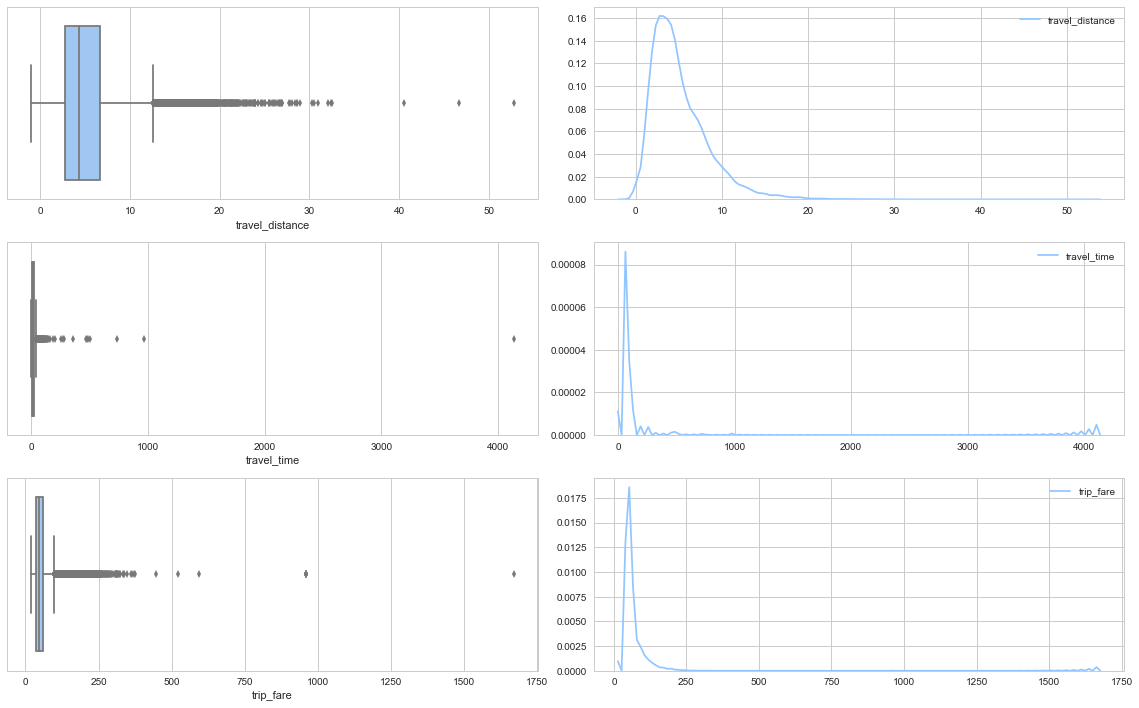

In [ ]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
fig_dims = (16, 10)
fig, ax = plt.subplots(nrows = 3, ncols = 2,figsize=fig_dims)

sns.boxplot(df['travel_distance'],ax=ax[0,0]);
sns.kdeplot(df['travel_distance'],ax=ax[0,1]);

sns.boxplot(df['travel_time'],ax=ax[1,0]);
sns.kdeplot(df['travel_time'],ax=ax[1,1]);

sns.boxplot(df['trip_fare'],ax=ax[2,0]);
sns.kdeplot(df['trip_fare'],ax=ax[2,1]);

fig.tight_layout()

### Time variables : timestamp

In [ ]:
df['timestamp_2'] = df.apply(lambda x: datetime.datetime.fromtimestamp(x['timestamp'] / 1e3) ,axis=1)
df['weekday'] = df.apply(lambda x : x['timestamp_2'].strftime('%A'),axis = 1)

In [ ]:
df.loc[df['customer_id'] == 'CUST_001',:]

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare,timestamp_2,weekday
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37,2019-01-05 22:57:50.211,Saturday
1389,ID1390,CUST_001,1546871083066,17.451511,78.370468,17.443994,78.363037,10.624,26.600417,99,2019-01-07 19:54:43.066,Monday
1866,ID1867,CUST_001,1546873649099,17.421120,78.339172,17.426586,78.324600,10.896,33.192900,107,2019-01-07 20:37:29.099,Monday
4983,ID4984,CUST_001,1546765642873,17.340305,78.543899,17.340197,78.543892,3.547,8.611033,41,2019-01-06 14:37:22.873,Sunday
5269,ID5270,CUST_001,1546769557670,17.441196,78.391518,17.441196,78.391518,7.523,17.608217,73,2019-01-06 15:42:37.670,Sunday
5528,ID5529,CUST_001,1546773038937,17.465193,78.341629,17.447012,78.373169,3.869,18.290983,54,2019-01-06 16:40:38.937,Sunday
33261,ID33262,CUST_001,1546676690138,17.504282,78.396835,17.440559,78.397995,3.562,8.069667,41,2019-01-05 13:54:50.138,Saturday
36625,ID36626,CUST_001,1546702978281,17.454794,78.375389,17.434425,78.422028,4.079,8.160700,43,2019-01-05 21:12:58.281,Saturday


In [ ]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare,timestamp_2,weekday
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37,2019-01-05 22:57:50.211,Saturday
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119,2019-01-05 22:58:29.524,Saturday
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27,2019-01-05 22:58:51.857,Saturday
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121,2019-01-05 22:59:18.403,Saturday
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58,2019-01-05 22:59:46.884,Saturday


In [ ]:
print('min date : ' + str(df['timestamp_2'].min()))
print('max date : ' + str(df['timestamp_2'].max()))
print('days of data given : ' + str(df['timestamp_2'].max() - df['timestamp_2'].min() ))

min date : 2019-01-02 00:02:07.135000
max date : 2019-01-07 23:59:25.111000
days of data given : 5 days 23:57:17.976000


Monday       20.0
Friday       19.0
Thursday     18.0
Wednesday    17.4
Saturday     15.4
Sunday       10.3
Name: weekday, dtype: float64


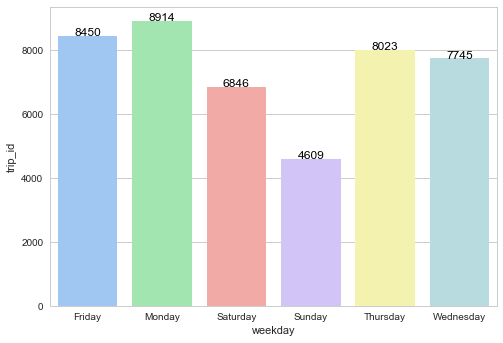

In [ ]:
groupedvalues = df.groupby('weekday').count().reset_index()
g=sns.barplot(x='weekday',y='trip_id',data=groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.trip_id, round(row.trip_id,2), color='black', ha="center")
    
print(round(df['weekday'].value_counts() * 100/df.shape[0],1))

#### We only have 6 days of data, no tuesday !!

### Other metrices based on trip id and customer id

In [ ]:
print('unique trips : ' + str(df['trip_id'].nunique()))
print('unique customers : ' + str(df['customer_id'].nunique()))
print('avg trips per customer : ' + str(round(df['trip_id'].nunique() / df['customer_id'].nunique() , 2)))

unique trips : 44587
unique customers : 19139
avg trips per customer : 2.33


In [ ]:
groupedvalues = df.groupby(by = 'customer_id').count()['trip_id'].value_counts().reset_index(name = 'trip_count')
groupedvalues['Percent'] = groupedvalues['trip_count'] * 100 / df['customer_id'].nunique()
groupedvalues

,index,trip_count,Percent
0,1,10009,52.296358
1,2,3884,20.293641
2,3,1741,9.096609
3,4,1144,5.977324
4,5,730,3.814201
5,6,483,2.523643
6,7,333,1.739903
7,8,282,1.473431
8,9,169,0.883014
9,10,136,0.710591


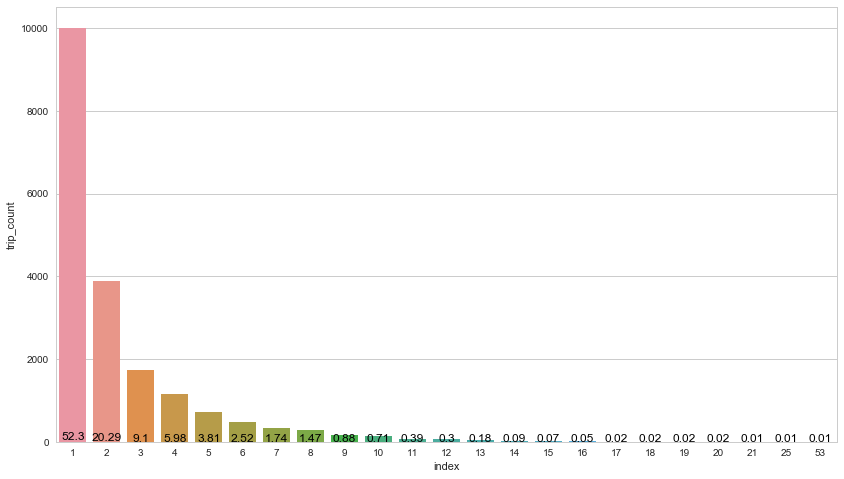

In [ ]:
fig_dims = (14, 8)
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=fig_dims)
g=sns.barplot(x='index',y='trip_count',data=groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Percent, round(row.Percent,2), color='black', ha="center")

### Correlation between variables

In [ ]:
df.columns

Index(['trip_id', 'customer_id', 'timestamp', 'pick_lat', 'pick_lng',
       'drop_lat', 'drop_lng', 'travel_distance', 'travel_time', 'trip_fare',
       'timestamp_2', 'weekday'],
      dtype='object')

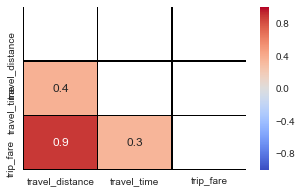

In [ ]:
fig_dims = (5, 3)
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=fig_dims)

columns = ['travel_distance','travel_time','trip_fare']

matrix = np.triu(df[columns].corr())
sns.heatmap(df[columns].corr(), annot=True, mask=matrix,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',fmt='.1g',linewidths=0.5, linecolor='black');


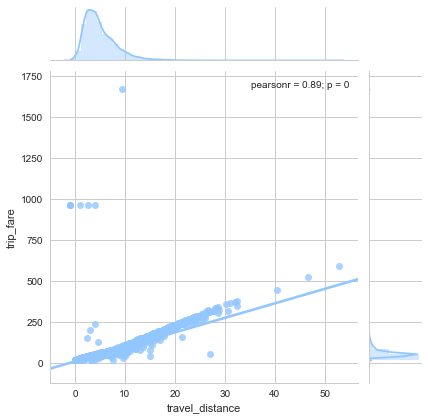

In [ ]:
sns.jointplot("travel_distance", "trip_fare", data=df, kind="reg");

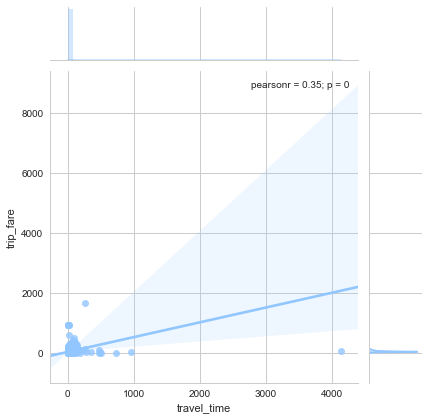

In [ ]:
sns.jointplot("travel_time", "trip_fare", data=df, kind="reg");

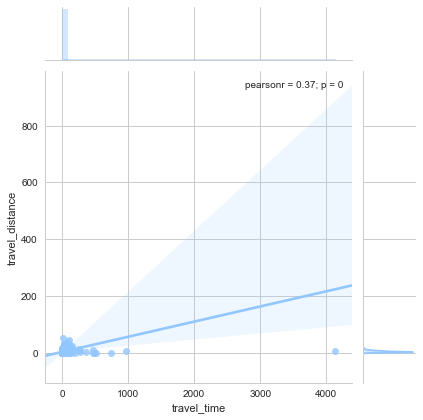

In [ ]:
sns.jointplot("travel_time", "travel_distance", data=df, kind="reg");

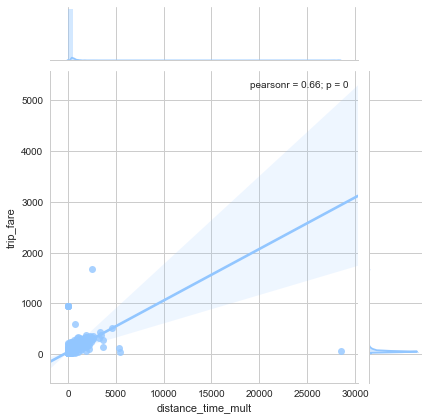

In [ ]:
df['distance_time_mult'] = df['travel_time'] * df['travel_distance']
sns.jointplot("distance_time_mult", "trip_fare", data=df, kind="reg");

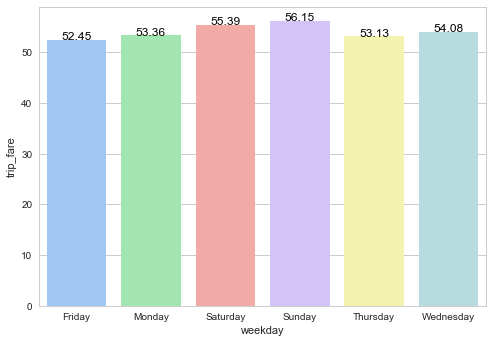

In [ ]:
grouped = df.groupby(by = 'weekday').mean()['trip_fare'].reset_index()
g = sns.barplot(x = 'weekday' , y = 'trip_fare' , data = grouped)
for index, row in grouped.iterrows():
    g.text(row.name,row.trip_fare, round(row.trip_fare,2), color='black', ha="center")

# PART 2 : Metric Calculation
What is the average duration between the 1st trip and the 2nd trip of customers? Note: Consider only the customers who have done 2 or more trips.

In [ ]:
df['customer_trip_order'] =  df.groupby(by = "customer_id")['timestamp_2'].rank()
df = df.sort_values(by = ['customer_id','timestamp_2'])
df['timestamp_lagged'] = df.groupby(['customer_id'])['timestamp_2'].shift(1)
df['diff'] = df.loc[df.customer_trip_order == 2,'timestamp_2'] - df.loc[df.customer_trip_order == 2,'timestamp_lagged']

In [ ]:
df_2 = df.loc[df.customer_trip_order == 2,:]

df_2['diff_days'] = df_2.apply(lambda x : x['diff'].days , axis = 1)
df_2['diff_minutes'] = df_2.apply(lambda x : x['diff'].seconds//60 , axis = 1)

df_2['total_hours'] =  (df_2['diff_days'] * 24 ) +  (df_2['diff_minutes'] / 60)

/Users/sanilahuja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sanilahuja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sanilahuja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [ ]:
ans = df_2['total_hours'].mean()

In [ ]:
print('average duration between the 1st trip and the 2nd trip of customers in hours : ' + str(ans))

average duration between the 1st trip and the 2nd trip of customers in hours : 24.777709017889695


# PART 3 : Model

In [ ]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [ ]:
cols = ['travel_distance','travel_time','distance_time_mult','trip_fare']

In [ ]:
df_model = df.loc[:,cols]

In [ ]:
df_model.head()

,travel_distance,travel_time,distance_time_mult,trip_fare
0,2.806,12.609667,NaN,37
1,11.991,24.075200,NaN,119
2,1.322,8.708300,NaN,27
3,11.822,24.037550,NaN,121
4,6.978,16.120867,NaN,58


In [ ]:
df_model.shape

(44587, 4)

## step 1 : run OLS regression without influence point removal

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df_model = df_model.loc[df.travel_distance > 0,:]

In [ ]:
df_model.shape

(44353, 4)

In [ ]:
f = 'trip_fare ~ travel_distance'
model = smf.ols(formula=f, data=df_model).fit()
print ('R-Squared:', model.rsquared)
print (model.params)

R-Squared: 0.8381775296745502
Intercept          8.420385
travel_distance    8.897664
dtype: float64


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              trip_fare   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 2.297e+05
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:56:11   Log-Likelihood:            -1.7707e+05
No. Observations:               44353   AIC:                         3.541e+05
Df Residuals:                   44351   BIC:                         3.542e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.4204      0.114     74.097      0.000       8.198       8.643
travel_distance     8.8977      0.019    479.292      0.000       8.861       8.934
==============================================================================
Omnibus:                   151933.529   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      76471013721.004
Skew:                          63.618   Prob(JB):                         0.00
Kurtosis:                    6434.430   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
f = 'trip_fare ~ travel_distance + travel_time'
model = smf.ols(formula=f, data=df_model).fit()
print ('R-Squared:', model.rsquared)
print (model.params)

# preds = model.predict(df[['travel_distance','travel_time']])

# df_model.plot(kind='scatter', x='travel_distance', y='trip_fare');
# plt.plot(df['travel_distance'], preds, c='blue', linewidth=2);
# plt.show()

R-Squared: 0.8384294642587
Intercept          8.357843
travel_distance    8.836019
travel_time        0.023808
dtype: float64


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              trip_fare   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 1.151e+05
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:56:13   Log-Likelihood:            -1.7704e+05
No. Observations:               44353   AIC:                         3.541e+05
Df Residuals:                   44350   BIC:                         3.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3578      0.114     73.442      0.000       8.135       8.581
travel_distance     8.8360      0.020    442.326      0.000       8.797       8.875
travel_time         0.0238      0.003      8.316      0.000       0.018       0.029
==============================================================================
Omnibus:                   151698.440   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      75329967366.507
Skew:                          63.329   Prob(JB):                         0.00
Kurtosis:                    6386.260   Cond. No.                         52.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 2 : remove influence points

In [ ]:
infl = model.get_influence()
sm_fr = infl.summary_frame()

In [ ]:
sm_fr.shape

(44353, 9)

In [ ]:
df_model.shape

(44353, 4)

In [ ]:
df_model_or = df_model.loc[sm_fr.cooks_d < sm_fr.cooks_d.mean(),:]

In [ ]:
df_model_or.shape

(44336, 4)

In [ ]:
f = 'trip_fare ~ travel_distance + travel_time'
model = smf.ols(formula=f, data=df_model_or).fit()
print ('R-Squared:', model.rsquared)
print (model.params)

# preds = model.predict(df[['travel_distance','travel_time']])

# df_model.plot(kind='scatter', x='travel_distance', y='trip_fare');
# plt.plot(df['travel_distance'], preds, c='blue', linewidth=2);
# plt.show()

R-Squared: 0.9411512272439387
Intercept          8.362040
travel_distance    8.708523
travel_time        0.057813
dtype: float64


In [ ]:
import sklearn.metrics

In [ ]:
X = df_model[['travel_distance','travel_time']]
Y = model.predict(df_model[['travel_distance','travel_time']])

In [ ]:
sklearn.metrics.r2_score(y_true = df_model['trip_fare'], y_pred = Y)

0.8378879651474944

### Predict fare price
use the model to predict trip_fare for a trip with travel_distance of 3.5 kms and travel_time
of 15 minutes.

In [ ]:
ans = 8.362040 + 3.5 * 8.708523 + 15 * 0.057813

In [ ]:
print('trip fare : ' + str(ans))

trip fare : 39.7090655


# PART 4 : HEX

In [ ]:
!pip install h3

     |████████████████████████████████| 562 kB 886 kB/s eta 0:00:01


In [ ]:
import h3

In [ ]:
df['pick_hexid'] = df.apply(lambda x : h3.geo_to_h3(lat = x['pick_lat'], lng = x['pick_lng'],resolution= 8),axis = 1)
df['drop_hexid'] = df.apply(lambda x : h3.geo_to_h3(lat = x['drop_lat'], lng = x['drop_lng'],resolution= 8),axis = 1)

df['hex_pair'] = df['pick_hexid'] + ' to ' + df['drop_hexid']

In [ ]:
df_tophex = df.groupby('hex_pair').count()['trip_id'].sort_values(ascending = False).reset_index()

In [ ]:
df_tophex.index += 1

In [ ]:
df_tophex.reset_index(inplace = True)

In [ ]:
df_tophex.columns = ['Rank','Hex pair (source_hexid, destination_hexid)','Total_Trips']

In [ ]:
df_tophex.head(8)

,Rank,"Hex pair (source_hexid, destination_hexid)",Total_Trips
0,1,8860a259b9fffff to 8860a25995fffff,194
1,2,8860a25995fffff to 8860a259b9fffff,90
2,3,8860a259b9fffff to 8860a259bbfffff,82
3,4,8860a259b9fffff to 8860a24a6dfffff,80
4,5,8860a24a6dfffff to 8860a24b51fffff,79
5,6,8860a24a65fffff to 8860a25995fffff,77
6,7,8860a259b9fffff to 8860a259b3fffff,74
7,8,8860a24a61fffff to 8860a24a6dfffff,70
